## Reproduces Extended Data Figure 9 in Lauer et al., Nature Methods 2022

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='ticks')

%matplotlib inline

Fig S9a

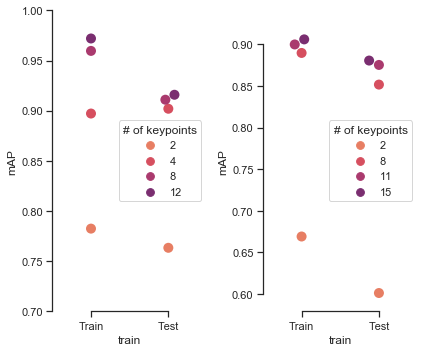

In [2]:
df = pd.read_hdf('../data/figS9/miceS9.h5')
df['train'].replace({'train': 'Train', 'test': 'Test'}, inplace=True)
conds = 'shuffle2', 'shuffle0', 'shuffle1', 'baseline'
nbpts = ['2', '4', '8', '12']
df['cond'].replace(dict(zip(conds, nbpts)), inplace=True)

fig, axes = plt.subplots(ncols=2, figsize=(6, 5), tight_layout=True)
g = sns.swarmplot(
    data=df, x="train", y="mAP", ax=axes[0], hue="cond",
    palette='flare', size=10, hue_order=nbpts,
)
leg = g.axes.get_legend()
leg.set_title('# of keypoints')
axes[0].set_ylim(0.7, 1.0)
axes[0].set_ylabel('mAP')
# fig.savefig(f'mAP_mice.png', dpi=600)

df2 = pd.read_hdf('../data/figS9/marmoS9.h5')
df2['train'].replace({'train': 'Train', 'test': 'Test'}, inplace=True)
conds = 'shuffle0', 'shuffle1', 'shuffle2', 'baseline'
nbpts = ['2', '8', '11', '15']
df2['cond'].replace(dict(zip(conds, nbpts)), inplace=True)

# fig, ax = plt.subplots(figsize=(3, 5), tight_layout=True)
g = sns.swarmplot(
    data=df2, x="train", y="mAP", ax=axes[1], hue="cond",
    palette='flare', size=10, hue_order=nbpts,
)
leg = g.axes.get_legend()
leg.set_title('# of keypoints')
axes[1].set_ylabel('mAP')
sns.despine(trim=True, fig=fig)
fig.savefig(f'figS9a.jpg', dpi=600)

plt.show()

Fig S9b

/var/folders/ct/4w_vk2wn10xb_xj2fm7d6vqc0000gn/T/ipykernel_14059/323312783.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['cond'] = temp['cond'].replace(dict(zip(conds, nbpts)))
/var/folders/ct/4w_vk2wn10xb_xj2fm7d6vqc0000gn/T/ipykernel_14059/323312783.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['train'] = temp['train'].replace({'train': 'Train', 'test': 'Test'})


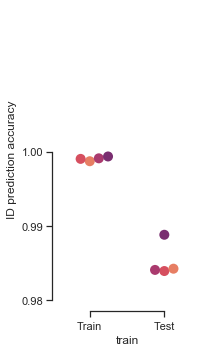

In [3]:
import pickle

bpts = {
    'baseline': [
        'Front', 'Right', 'Middle', 'Left',
        'FL1', 'BL1', 'FR1', 'BR1', 'BL2', 'BR2', 'FL2', 'FR2',
        'Body1', 'Body2', 'Body3',
    ],
}
bpts['shuffle0'] = ['Middle', 'Body2']
bpts['shuffle1'] = bpts['shuffle0'] + ['Right', 'Left', 'FL1', 'BL1', 'FR1', 'BR1']
bpts['shuffle2'] = bpts['shuffle1'] + ['Front', 'Body1', 'Body3']
bpts['shuffle3'] = ['Middle']

with open('../data/figS9/ids.pickle', 'rb') as file:
    data = pickle.load(file)
conds = 'shuffle3', 'shuffle0', 'shuffle1', 'shuffle2', 'baseline'
dfs = []
niters = 50000
for cond in conds:
    key = f'ids_{cond}_{niters}.pickle'
    _, accu = data[key]
    df = pd.DataFrame(accu, columns=['acc_train', 'acc_test'])
    df['bpts'] = bpts[cond]
    df['cond'] = cond
    df['niter'] = niters
    dfs.append(df)
df = pd.concat(dfs)
df.rename({'acc_train': 'train', 'acc_test': 'test'}, axis=1, inplace=True)
df = pd.melt(
    df, id_vars=['bpts', 'cond', 'niter'], var_name='train', value_name='acc',
)

nbpts = ['1', '2', '8', '11', '15']
temp = df[(df['bpts'] == 'Middle') & (df['niter'] == niters)]
temp['cond'] = temp['cond'].replace(dict(zip(conds, nbpts)))
temp['train'] = temp['train'].replace({'train': 'Train', 'test': 'Test'})
temp = temp[temp['cond'] != '1']
fig, ax = plt.subplots(figsize=(3, 5), tight_layout=True)
g = sns.swarmplot(
    data=temp, x="train", y="acc", ax=ax, hue="cond",
    palette='flare', size=10,
)
leg = g.axes.get_legend()
leg.set_title('# of keypoints')
ax.set_yticks([0.98, 0.99, 1.00])
ax.set_ylabel('ID prediction accuracy')
ax.get_legend().remove()
sns.despine(trim=True)
fig.savefig('figS9b.jpg', dpi=600)

plt.show()

Fig S9c

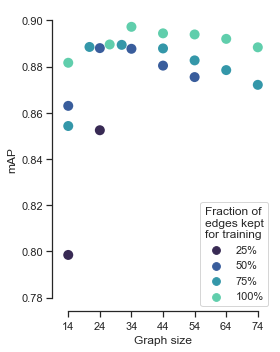

In [4]:
df = pd.read_table('../data/figS9/subgraph.txt')
df = pd.melt(df, id_vars='pruning', value_vars=df.columns.tolist()[1:])
df['pruning'] = [str(a) + '%' for a in df['pruning']]

fig, ax = plt.subplots(figsize=(4, 5), tight_layout=True)
g = sns.swarmplot(
    data=df, x="variable", y="value", ax=ax, hue="pruning",
    palette='mako', size=10,
)
leg = g.axes.get_legend()
leg.set_title('Fraction of\nedges kept\nfor training')
ax.set_ylabel('mAP')
ax.set_xlabel('Graph size')
sns.despine(trim=True)
fig.savefig(f'figS9c.jpg', dpi=600)

plt.show()